#  Housing price predictions Model
This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).” The dataset has 20,640 samples—one per block group—with eight features each: • median income—in tens of thousands, so 8.37 would represent $83,700 • median house age—in the dataset, the maximum value for this feature is 52 • average number of rooms • average number of bedrooms • block population • average house occupancy • house block latitude • house block longitude 

In [46]:
#Import all Neccessary Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Call California Dataset from Sklearn Dataset
from sklearn.datasets import fetch_california_housing

In [4]:
#initialise the dataset and read it in
california = fetch_california_housing()

In [14]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [16]:
#Shape of the Dataset
california.data.shape

(20640, 8)

In [17]:
california.target.shape

(20640,)

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [24]:
pd.set_option('precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)

In [25]:
california_df = pd.DataFrame(california.data,columns=california.feature_names)

In [28]:
california_df
california_df['MedHouseValue'] = pd.Series(california.target)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09,0.781
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21,0.771
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22,0.923
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32,0.847


In [33]:
california_df.head() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


In [34]:
#No Missing Values - Confirmed
california_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [36]:
california_df.describe() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [44]:
#Lets Visualise

sample_df = california_df.sample(frac=0.1, random_state=17)

In [45]:
sample_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
18403,5.4741,24.0,6.5878,1.0602,4017.0,3.3116,37.24,-121.84,2.388
13405,1.9583,7.0,5.3628,1.4421,1064.0,3.2439,34.10,-117.46,1.088
9539,2.6058,40.0,3.8857,0.9143,785.0,4.4857,37.39,-120.71,0.727
8668,4.5817,30.0,4.1461,1.1087,1526.0,1.8430,33.82,-118.39,5.000
9019,8.0137,9.0,7.7347,1.0412,12873.0,3.2747,34.16,-118.78,3.992
...,...,...,...,...,...,...,...,...,...
19279,1.9458,26.0,4.7097,1.0202,937.0,3.7782,38.42,-122.72,1.460
12378,1.3801,25.0,4.7375,1.7250,604.0,2.5167,33.78,-116.46,0.550
16068,3.7361,48.0,5.7546,1.1055,1041.0,2.7467,37.75,-122.49,3.202
16563,5.0176,19.0,6.0615,0.9564,1264.0,3.2410,37.77,-121.48,2.742


In [47]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

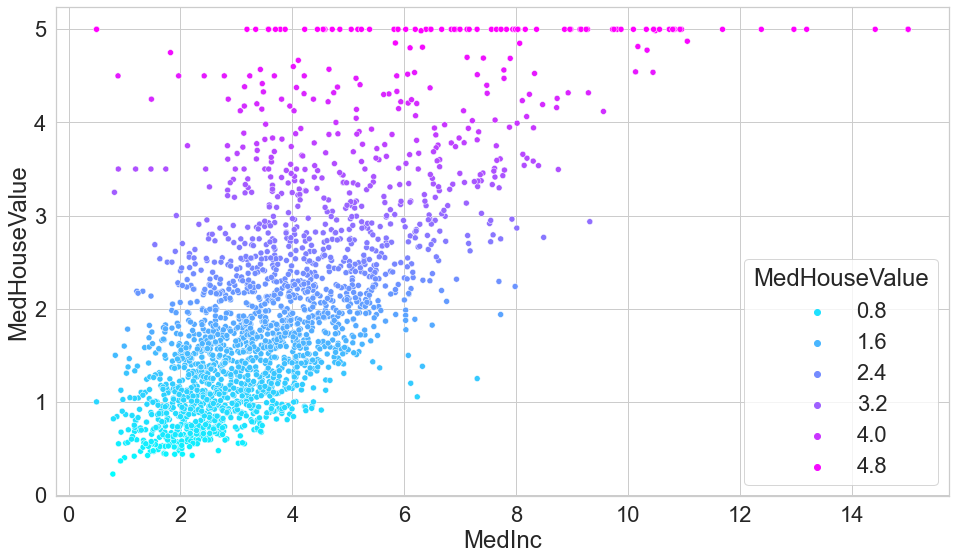

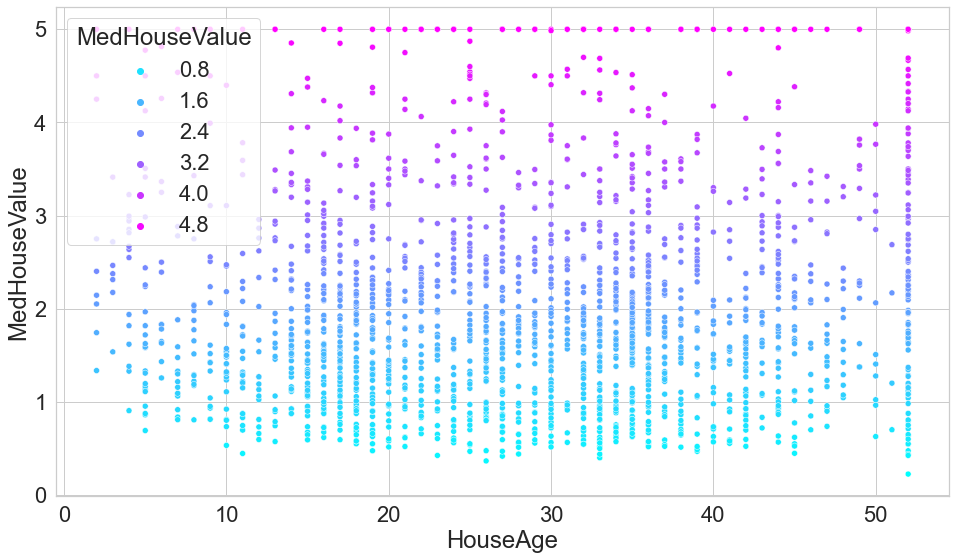

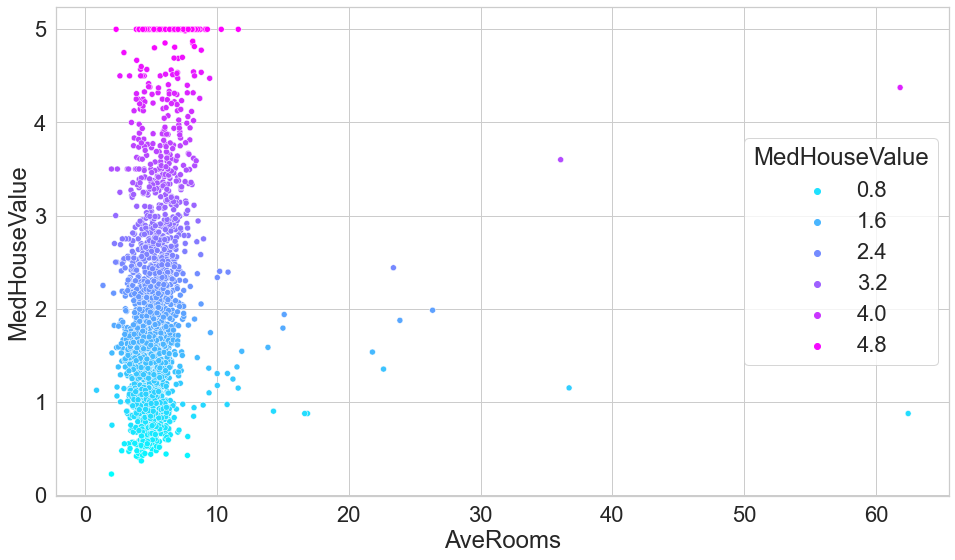

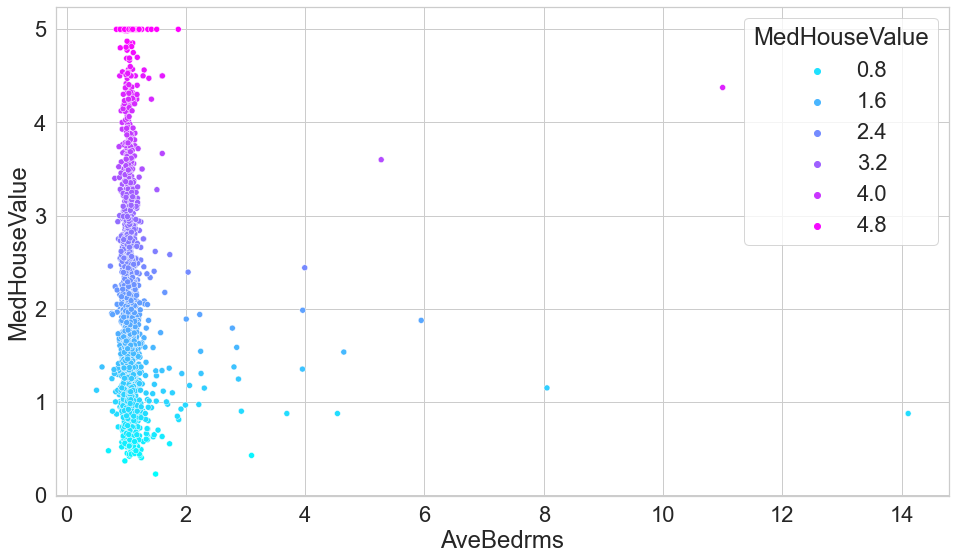

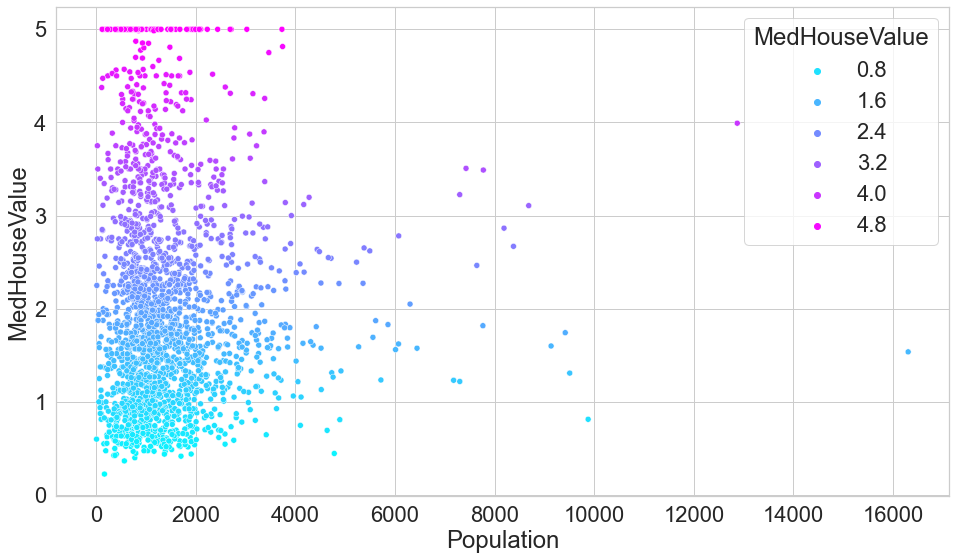

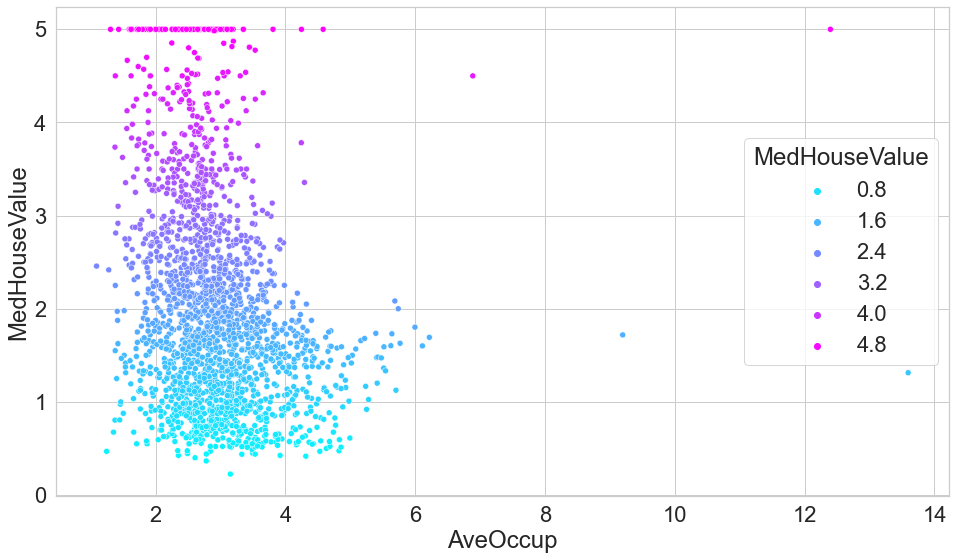

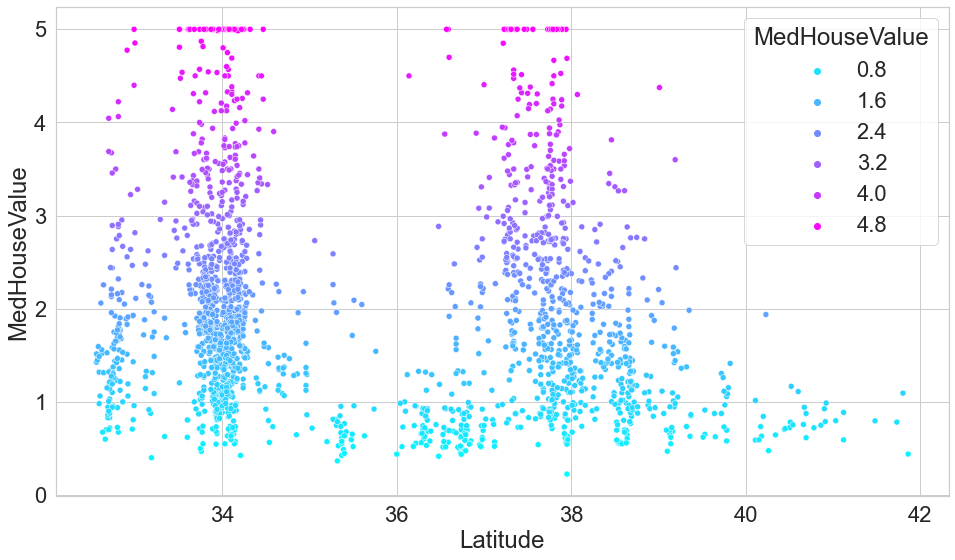

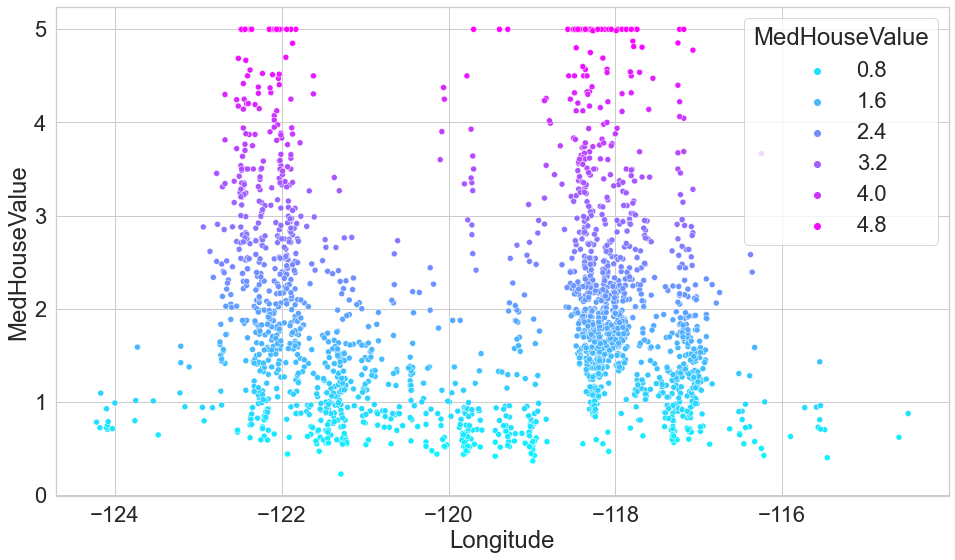

In [49]:
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df, x=feature,
                   y='MedHouseValue',
                    hue ='MedHouseValue',
                    palette ='cool'
                    
                   )

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    random_state = 11)

In [52]:
X_train.shape

(15480, 8)

In [53]:
X_test.shape

(5160, 8)

In [54]:
#Import Model to use
from sklearn.linear_model import LinearRegression

In [55]:
#Call the Model
linreg = LinearRegression()

In [56]:
#Fit the model
linreg.fit(X_train, y_train)

LinearRegression()

In [62]:
linreg.intercept_

-36.882950656055534

In [69]:
for i, name in enumerate(california.feature_names):
    print(f'{name:>10}: {linreg.coef_[i]}') 
    

    MedInc: 0.43770302153822166
  HouseAge: 0.009216834565797572
  AveRooms: -0.10732526637361
 AveBedrms: 0.611713307391811
Population: -5.756822009277476e-06
  AveOccup: -0.0033845664657162766
  Latitude: -0.4194818609649057
 Longitude: -0.43377133498740145


In [67]:
linreg.coef_

array([ 4.37703022e-01,  9.21683457e-03, -1.07325266e-01,  6.11713307e-01,
       -5.75682201e-06, -3.38456647e-03, -4.19481861e-01, -4.33771335e-01])

In [58]:
predicted = linreg.predict(X_test)

In [59]:
expected = y_test

In [72]:
predicted[:10]

array([1.25396876, 2.34693107, 2.03794745, 1.8701254 , 2.53608339,
       2.36316557, 2.12559446, 2.74800393, 3.0498048 , 1.19693447])

In [60]:
expected[:10]

array([0.762, 1.732, 1.125, 1.37 , 1.856, 2.393, 1.214, 2.389, 1.663,
       1.063])

In [73]:
df =pd.DataFrame()

df['Expected']=pd.Series(expected)
df['Predicted']=pd.Series(predicted)

In [74]:
df

,Expected,Predicted
0,0.762,1.2540
1,1.732,2.3469
2,1.125,2.0379
3,1.370,1.8701
4,1.856,2.5361
...,...,...
5155,0.906,1.7462
5156,2.782,2.6304
5157,0.700,1.4138
5158,0.866,1.2662


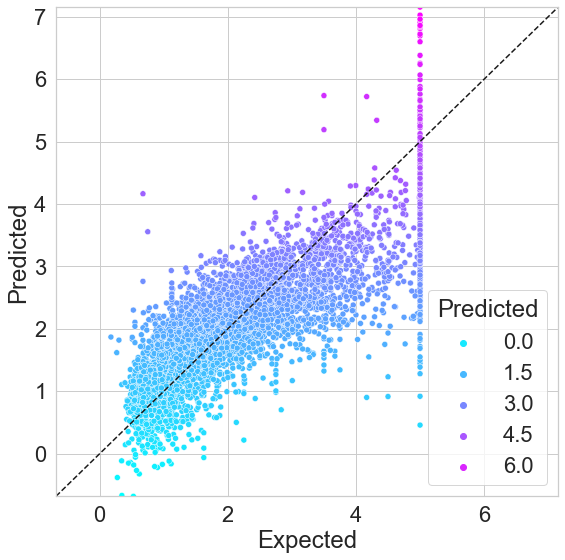

In [84]:
figure = plt.figure(figsize=(9,9))
axes =sns.scatterplot(data=df, x="Expected", 
                      y="Predicted", 
                      hue='Predicted', 
                      palette='cool' )
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')


In [86]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.6008983115964326

In [87]:
metrics.mean_squared_error(expected, predicted)

0.5350149774449126

In [91]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge


In [92]:
estimators = {
    'LinearRegression':linreg,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Rige': Ridge()    
}

In [101]:
from sklearn.model_selection import KFold, cross_val_score
for estimators_name, estimator_object in estimators.items():
    kfold =KFold(n_splits=10, random_state =11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=california.data, 
                            y=california.target,
                            cv=kfold, scoring='r2')
    print(f'{estimators_name:<16}:' + f" mean of r2 score{scores.mean():.3f}")

LinearRegression: mean of r2 score0.599
ElasticNet      : mean of r2 score0.423
Lasso           : mean of r2 score0.285
Rige            : mean of r2 score0.599
